In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv(r"netflix_titles.csv")


first we imported the libraries we will use and used the 'read_csv' function to import our dataset

In [7]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Being comfortable with the data

### removing duplicates if found

In [4]:
data[data.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


as you can see there is no duplicates in the data

### looking for the null values

In [10]:
data.shape

(8807, 12)

using **shape** you can see the total number of rows(the first number) and the number of columns(the second number)

In [5]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

as you can see above most null values are found in the **director** ,**cast** and **country** columns.
This was done by using the **isnull** function which returns which element is null form the dataset as a boolean form(so true for this is a null and false for this is not a null), then we used the **sum** function to add all the boolean values made by the **isnull** function (since true can be also 1 and false is 0)

In [11]:
#finding out the percentage of null values

missing_percentage =( data.isnull().sum() / data.shape[0] )* 100

In [12]:
# turning the wanted values into lists

missing_percentage.to_list()
cldata = data.columns.to_list()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'show_id'),
  Text(1, 0, 'type'),
  Text(2, 0, 'title'),
  Text(3, 0, 'director'),
  Text(4, 0, 'cast'),
  Text(5, 0, 'country'),
  Text(6, 0, 'date_added'),
  Text(7, 0, 'release_year'),
  Text(8, 0, 'rating'),
  Text(9, 0, 'duration'),
  Text(10, 0, 'listed_in'),
  Text(11, 0, 'description')])

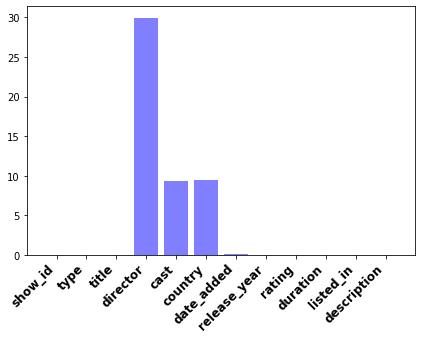

In [30]:
#showing the data on a graph
plt.bar(cldata ,missing_percentage ,color ='blue' ,alpha=0.5 )
plt.tight_layout()
plt.xticks(color='black', rotation=45, fontweight='bold', fontsize='12', horizontalalignment='right')


The following graph shows the amount of null values that are found in every column...as we can see the **director ,cast ,country** columns have the largest amount of null values 

### Most popular catigories

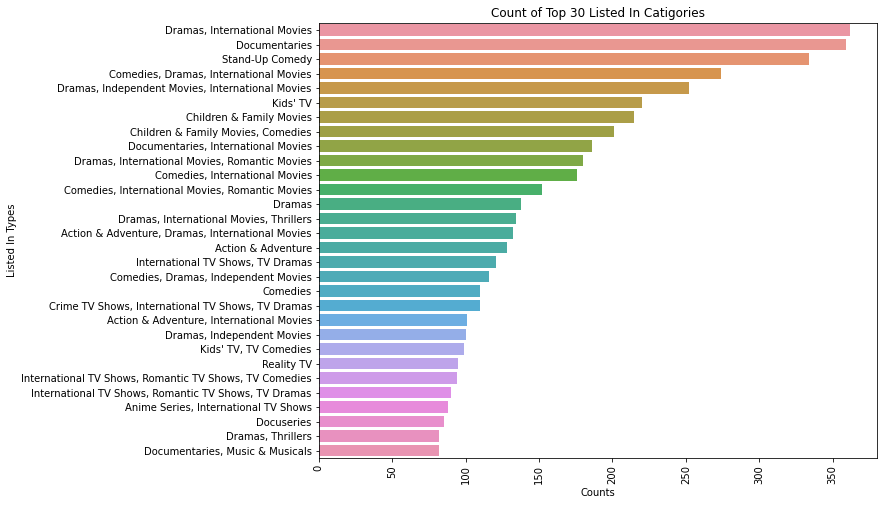

In [10]:
plt.figure(figsize=(10,8))
listed_in_num = data.groupby('listed_in').size().sort_values(ascending= False)[:30]
listed_in_index = listed_in_num.index

sns.barplot(y=listed_in_index,x=listed_in_num,orient="h")
plt.xlabel('Counts')
plt.ylabel('Listed In Types')
plt.xticks(rotation=90)
plt.title('Count of Top 30 Listed In Catigories')
plt.show()


### Top 10 production countries

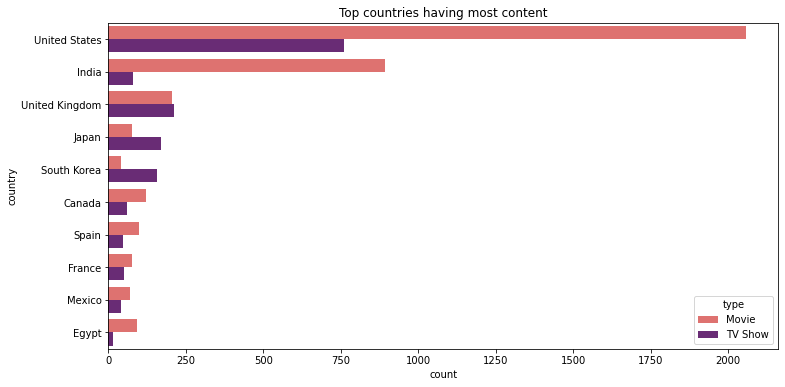

In [11]:
fig = plt.figure(figsize=(12,6))
sns.countplot(data = data,y = 'country', order = data["country"].value_counts().index[:10],hue = 'type',palette = 'magma_r')
plt.title("Top countries having most content")
plt.show()


# spliting the data according to it's type
(movies and shows)

In [32]:
movies = data[data['type']=='Movie']
shows = data[data['type']=='TV Show']

<AxesSubplot:xlabel='type', ylabel='count'>

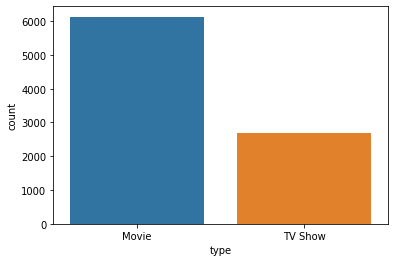

In [35]:
#comparing movies and shows according to their count
sns.countplot(x='type' ,data=data)

## Dates in which producers mostly release a movie  or  a show

In [9]:
def analyze_months_and_shows(DATA):
    netflix_date = data[['date_added']].dropna() 
    netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split()[-1])
    netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.split()[0]) 
    month_order=['January', 'February', 'March', 'April','May','June','July','August','September','October','November','December'][::-1]
    df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
    graph(df)
    return df

looking at this chunk of code is really scary ,but it isn't that hard(except for the last three lines).

After we made our function we made a new variable (**netflix_date**) which reprsent one column of our large dataset(the **date_added** column)after we removed the rows that contain a null value using the **dropna** function.

then we split the **netflix_date** into **Years** and **Months** by using the **split** function.

In [2]:
def graph(df):
    plt.figure(figsize=(6,5), dpi=200)
    plt.pcolor(df, cmap='afmhot_r')
    plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns,fontsize=7)
    plt.yticks(np.arange(0.5, len(df.index), 1), df.index,fontsize=7)
    plt.title("Netflix content update ", fontsize=10)

    cbar=plt.colorbar()
    cbar.ax.tick_params(labelsize=8) 
    cbar.ax.minorticks_on()
    plt.show()

Here we made a figure for our graph , then customized the graph to make it look nicer

#### Movie release with month and year wise

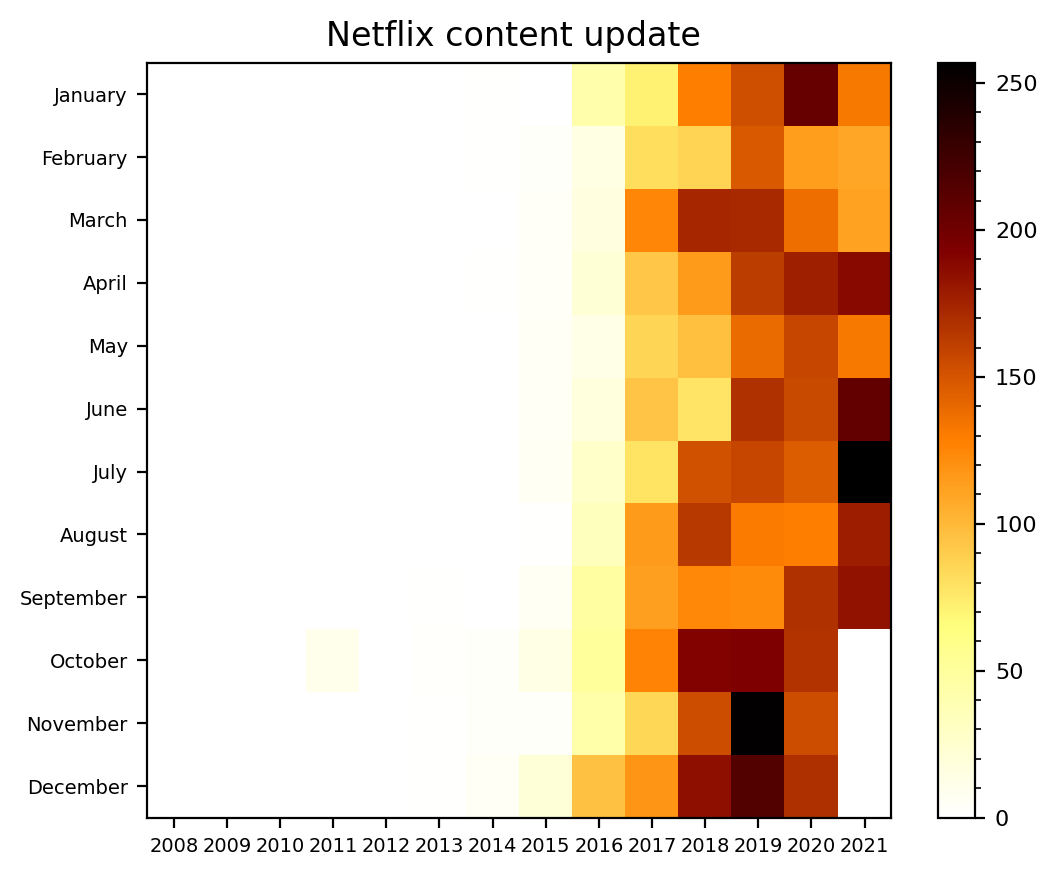

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,
December,0.0,0.0,0.0,0.0,1.0,2.0,6.0,21.0,96.0,118.0,185.0,215.0,169.0,0.0
November,0.0,1.0,1.0,0.0,1.0,2.0,4.0,4.0,44.0,85.0,154.0,255.0,154.0,0.0
October,0.0,0.0,0.0,11.0,0.0,3.0,4.0,14.0,51.0,126.0,191.0,193.0,167.0,0.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,48.0,113.0,124.0,123.0,168.0,183.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,34.0,115.0,164.0,131.0,129.0,178.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,28.0,79.0,152.0,157.0,146.0,257.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,18.0,94.0,78.0,168.0,156.0,207.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,13.0,86.0,97.0,139.0,157.0,132.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,93.0,115.0,162.0,177.0,188.0


In [50]:
analyze_months_and_shows(movies)

#### Shows release with month and year wise 

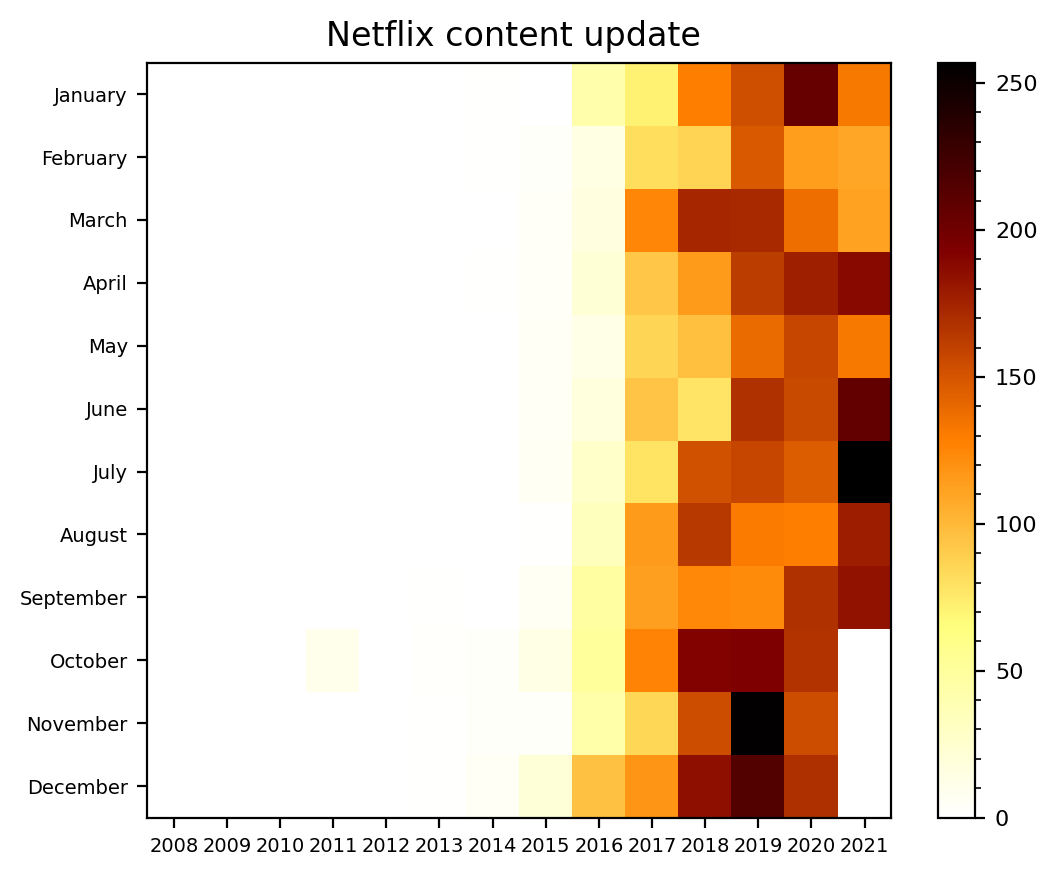

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,
December,0.0,0.0,0.0,0.0,1.0,2.0,6.0,21.0,96.0,118.0,185.0,215.0,169.0,0.0
November,0.0,1.0,1.0,0.0,1.0,2.0,4.0,4.0,44.0,85.0,154.0,255.0,154.0,0.0
October,0.0,0.0,0.0,11.0,0.0,3.0,4.0,14.0,51.0,126.0,191.0,193.0,167.0,0.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,48.0,113.0,124.0,123.0,168.0,183.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,34.0,115.0,164.0,131.0,129.0,178.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,28.0,79.0,152.0,157.0,146.0,257.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,18.0,94.0,78.0,168.0,156.0,207.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,13.0,86.0,97.0,139.0,157.0,132.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,93.0,115.0,162.0,177.0,188.0


In [51]:
analyze_months_and_shows(shows)

In [7]:
#adding a new date column as per date_added

data['date_added'] = pd.to_datetime(data['date_added'])

data['month_added']=data['date_added'].dt.month
data['month_name_added']=data['date_added'].dt.month_name()
data['year_added'] = data['date_added'].dt.year

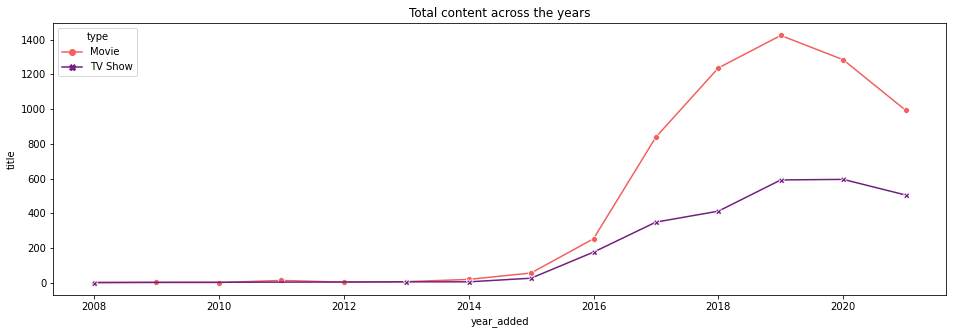

In [8]:
type_year = (data.groupby(['type','year_added'])['title'].size()).reset_index()
fig = plt.figure(figsize=(16,5))
sns.lineplot(data = type_year,x = 'year_added',y = 'title',hue = 'type',style = 'type',palette='magma_r',markers=True, dashes=False)
plt.title("Total content across the years")
plt.show()

as we can notice the movie production has increased exponentially compared with TV shows, since 2016